# Lasso Block Update

https://github.com/pymc-devs/pymc3/blob/master/pymc3/examples/lasso_block_update.ipynb

Sometimes, it is very useful to update a set of parameters together. For example, variables that are highly correlated are often good to update together. In PyMC 3 block updating is simple, as example will demonstrate.

Here we have a LASSO regression model where the two coefficients are strongly correlated. Normally, we would define the coefficient parameters as a single random variable, but here we define them separately to show how to do block updates.

First we generate some fake data.

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
from pymc3 import * 
import numpy as np 

d = np.random.normal(size=(3, 30))
d1 = d[0] + 4
d2 = d[1] + 4
yd = .2*d1 +.3*d2 + d[2]

Then define the random variables.

In [4]:
lam = 3

with Model() as model:
    s = Exponential('s', 1)
    tau = Uniform('tau', 0, 1000)
    b = lam * tau
    m1 = Laplace('m1', 0, b)
    m2 = Laplace('m2', 0, b)
    
    p = d1*m1 + d2*m2
    
    y = Normal('y', mu=p, sd=s, observed=yd) 

Applied log-transform to s and added transformed s_log to model.
Applied interval-transform to tau and added transformed tau_interval to model.


For most samplers, including Metropolis and HamiltonianMC, simply pass a list of variables to sample as a block. This works with both scalar and array parameters. 

In [5]:
with model: 
    start = find_MAP()
    
    step1 = Metropolis([m1, m2])
    
    step2 = Slice([s, tau])
    
    trace = sample(10000, [step1, step2], start=start)

 [-----------------100%-----------------] 10000 of 10000 complete in 36.4 sec

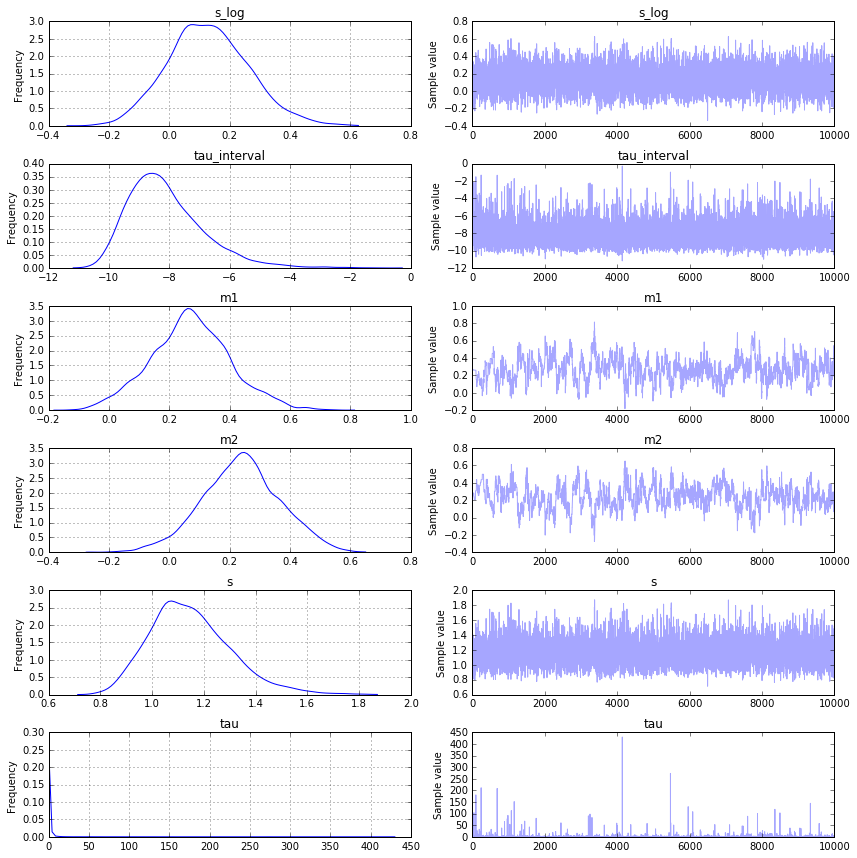

In [13]:
traceplot(trace);

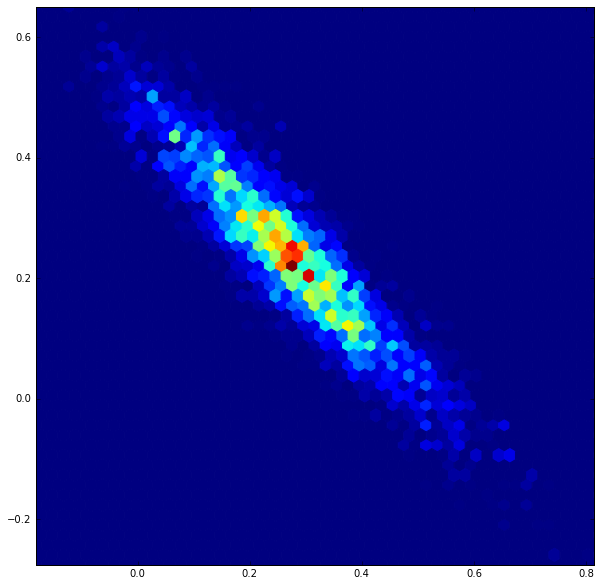

In [11]:
plt.figure(figsize=(10,10))
hexbin(trace[m1],trace[m2], gridsize = 50)